## 1 (35 points)

In [34]:
# Question 1 | Step 1: Load & Normalize the Data
import pandas as pd
import numpy as np

df = pd.read_csv("./data/Dataset1.txt", names=["GPA", "SAT", "Admitted"])

# Normalize GPA and SAT
mean_gpa, std_gpa = df["GPA"].mean(), df["GPA"].std()
mean_sat, std_sat = df["SAT"].mean(), df["SAT"].std()

df["GPA_norm"] = (df["GPA"] - mean_gpa) / std_gpa
df["SAT_norm"] = (df["SAT"] - mean_sat) / std_sat

# Sum of first and last row of normalized GPA & SAT
gpa_sum = df["GPA_norm"].iloc[0] + df["GPA_norm"].iloc[-1]
sat_sum = df["SAT_norm"].iloc[0] + df["SAT_norm"].iloc[-1]

# Round up to 3 decimal places
gpa_sum = round(gpa_sum, 3)
sat_sum = round(sat_sum, 3)

print("Sum of first + last row of normalized GPA:", gpa_sum)
print("Sum of first + last row of normalized SAT:", sat_sum)

Sum of first + last row of normalized GPA: -0.549
Sum of first + last row of normalized SAT: -0.662


In [35]:
# Question 2 | Step 2: Implement Logistic Regression
from scipy.optimize import minimize

# Add intercept column (x_0 = 1)
X = np.c_[np.ones(df.shape[0]), df["GPA_norm"], df["SAT_norm"]]
y = df["Admitted"].values
theta = np.zeros(X.shape[1])  # Initialize theta as [0,0,0]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Compute initial cost
initial_cost = cost_function(theta, X, y)
print("Initial Cost:", round(initial_cost, 3))

Initial Cost: 0.693


In [36]:
# Question 2 | Step 3: Optimize Theta Using Gradient Descent
 
# # Gradient function
def gradient(theta, X, y):
    m = len(y)
    return (1/m) * X.T @ (sigmoid(X @ theta) - y)

# Use minimize function from scipy.optimize
result = minimize(cost_function, theta, args=(X, y), method="BFGS", jac=gradient)

# Optimized theta
optimal_theta = result.x
final_cost = result.fun

print("Optimized Theta:", optimal_theta.round(3))
print("Final Cost Function Value:", round(final_cost, 3))

Optimized Theta: [2.794 1.791 1.598]
Final Cost Function Value: 0.277


In [37]:
# Question 2 | Step 4: Predict Admission

# Prediction function
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Generate predictions
y_pred = predict(X, optimal_theta)

# Count admitted (1) and not admitted (0)
num_admitted = np.sum(y_pred == 1)
num_not_admitted = np.sum(y_pred == 0)

print("Number of admitted students:", num_admitted)
print("Number of not admitted students:", num_not_admitted)

Number of admitted students: 860
Number of not admitted students: 140


In [38]:
# Question 3 | Step 5: Compute Model Accuracy

from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Regression Score (Accuracy):", round(accuracy, 3))

Regression Score (Accuracy): 0.866


In [39]:
# Question 3 | Step 6: Compute Admission Probability for Given GPA & SAT

# Compute probability
test_point = np.array([1, 0.35, 0.15])  # Normalized values
admission_prob = sigmoid(test_point @ optimal_theta)

print("Admission Probability:", round(admission_prob, 3))

Admission Probability: 0.975


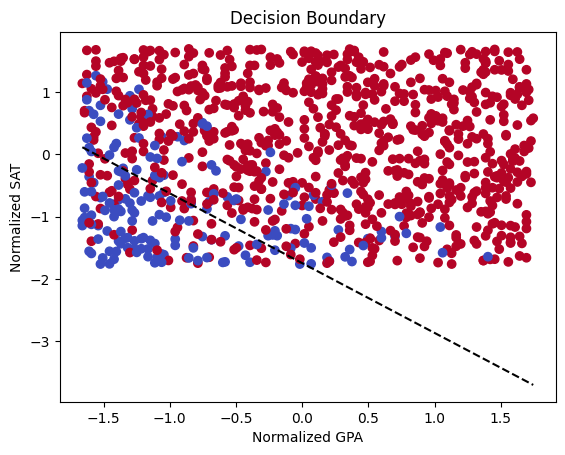

In [40]:
# Question 4 | Step 7: Plot Decision Boundary
import matplotlib.pyplot as plt

# Plot decision boundary
plot_x = np.array([df["GPA_norm"].min(), df["GPA_norm"].max()])
plot_y = -(optimal_theta[0] + optimal_theta[1] * plot_x) / optimal_theta[2]

plt.scatter(df["GPA_norm"], df["SAT_norm"], c=df["Admitted"], cmap="coolwarm")
plt.plot(plot_x, plot_y, color="black", linestyle="--")
plt.xlabel("Normalized GPA")
plt.ylabel("Normalized SAT")
plt.title("Decision Boundary")
plt.show()

In [41]:
# Question 5 | Step 8: Convert Normalized Scores Back to Real Values

real_gpa = 0.35 * std_gpa + mean_gpa
real_sat = 0.15 * std_sat + mean_sat

print("Real GPA:", round(real_gpa, 2))
print("Real SAT:", round(real_sat, 2))

Real GPA: 3.18
Real SAT: 1064.38
